In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Implementing NN from scratch  
The following [codebase](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) was taken form [Neural Networks and Deep Learning Book](http://neuralnetworksanddeeplearning.com/chap1.html).

In [93]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

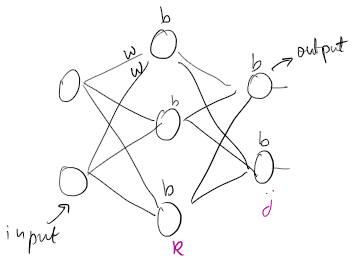  
For a NN with net = Network([2,3,2]):  
1. There are 2 inputs, 1 hidden layer with 3 neurons and 2 outputs.
2. `biases` shape is [(3,1),(1,2)]   
    a. Biases are not considered for 1<sup>st</sup> layer, since it is the input layer.
3. `weights` shape is [(3,2),(2,3)]  
    b. Weights shape is (j,k) where j is n<sup>th</sup> layer and k is n-1<sup>th</sup> layer. 

In [94]:
def feedforward(self, a):
    """Return the output of the network if "a" is input."""
    for b, w in zip(self.biases, self.weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

setattr(Network, 'feedforward', feedforward)

In [95]:
def SGD(self, training_data, epochs, mini_batch_size, eta,
        test_data=None):
    """Train the neural network using mini-batch stochastic
    gradient descent.  The "training_data" is a list of tuples
    "(x, y)" representing the training inputs and the desired
    outputs.  The other non-optional parameters are
    self-explanatory.  If "test_data" is provided then the
    network will be evaluated against the test data after each
    epoch, and partial progress printed out.  This is useful for
    tracking progress, but slows things down substantially."""
    if test_data: n_test = len(test_data)
    n = len(training_data)
    for j in range(epochs):
        np.random.shuffle(training_data)
        mini_batches = [
            training_data[k:k+mini_batch_size]
            for k in range(0, n, mini_batch_size)]
        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch, eta)
        if test_data:
            correct_pred = self.evaluate(test_data)
            print(f"""Epoch {j}: {correct_pred} / {n_test} :{
                np.round((correct_pred*100/n_test),decimals = 3)}%""")
        else:
            print(f"Epoch {j} complete")
            
setattr(Network, 'SGD', SGD)

In [96]:
def update_mini_batch(self, mini_batch, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The "mini_batch" is a list of tuples "(x, y)", and "eta"
    is the learning rate."""
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = self.backprop(x, y)
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    self.weights = [w-(eta/len(mini_batch))*nw 
                    for w, nw in zip(self.weights, nabla_w)]
    self.biases = [b-(eta/len(mini_batch))*nb 
                   for b, nb in zip(self.biases, nabla_b)]
    
setattr(Network, 'update_mini_batch', update_mini_batch)

`mini_batch` is a list of tuples `(x, y)`, where x is training inputs and y is the expected output.  
'nabla' represents second order derivative.  
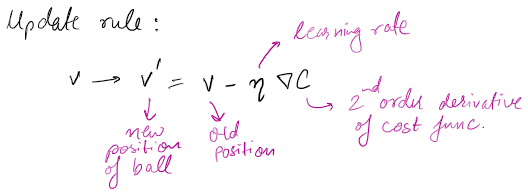

In [97]:
def backprop(self, x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(self.biases, self.weights):
        z = np.dot(w, activation)+b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    # backward pass
    delta = self.cost_derivative(activations[-1], y) * \
        sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    # Note that the variable l in the loop below is used a little
    # differently to the notation in Chapter 2 of the book.  Here,
    # l = 1 means the last layer of neurons, l = 2 is the
    # second-last layer, and so on.  It's a renumbering of the
    # scheme in the book, used here to take advantage of the fact
    # that Python can use negative indices in lists.
    for l in range(2, self.num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    return (nabla_b, nabla_w)

def cost_derivative(self, output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

def evaluate(self, test_data):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    test_results = [(np.argmax(self.feedforward(x)), y)
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)

setattr(Network, 'backprop', backprop)
setattr(Network, 'cost_derivative', cost_derivative)
setattr(Network, 'evaluate', evaluate)

In [99]:
#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

By default, numpy treats `z` as a vector and applies `np.exp()` element-wise.

# Digit Recognization  
## Data preparation

In [100]:
import os
import pandas as pd

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
labelled_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# print(training_data.dtypes)
print(labelled_data.shape)

tr_d = labelled_data[:33600] #80%

v_d = labelled_data[:8400] #20%
print(tr_d.shape)
print(v_d.shape)

te_d = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
# print(test_data.dtypes)
te_d = te_d[:]
print(te_d.shape)

(42000, 785)
(33600, 785)
(8400, 785)
(28000, 784)


In [102]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    with open('/kaggle/input/digit-recognizer/train.csv','r') as f:
            csv_reader = csv.reader(f,delimiter = ',')
            count = tr = va = 0
            tr_img = np.ndarray(shape=(33600,784), dtype = int)
            tr_label = np.ndarray(shape=(33600,1), dtype = int)
            v_img = np.ndarray(shape=(8400,784), dtype = int)
            v_label = np.ndarray(shape=(8400,1), dtype = int)
            for line in csv_reader:

                if count == 0: 
                    count+=1 
                    continue

                if count >= 1 and count <= 33600:
                    tr_img[count-1] = np.array(line[1:])
                    tr_label[count-1] = int(line[0])
                    tr += 1

                if count >= 33601 and count <= 42001:
                    v_img[count-33601] = np.array(line[1:])
                    v_label[count-33601] = int(line[0])
                    va += 1

                count += 1


            training_data = (tr_img,tr_label)
            validation_data = (v_img,v_label)

    with open('/kaggle/input/digit-recognizer/test.csv','r') as f:
            csv_reader = csv.reader(f,delimiter = ',')
            count = 0
            te_img = np.ndarray(shape=(28000,784), dtype = int)
            te_label = np.ndarray(shape=(28000,1), dtype = int)
            for line in csv_reader:
                if count == 0: 
                    count+=1 
                    continue

                if count >= 1 and count <= 28000:
                    te_img[count-1] = np.array(line[:])
                    te_label[count-1] = int(-1) #since we dont have test labels
                count += 1

            test_data = (te_img,te_label)


    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

## NN training

In [63]:
# Training 1 layer NN:
training_data, validation_data, test_data = load_data_wrapper()

net = Network([784,30,10])
net.SGD(training_data, 30, 10, 0.05, test_data=validation_data)

/tmp/ipykernel_33/1391037560.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch 0: 2166 / 8400 :25.786%
Epoch 1: 2666 / 8400 :31.738%
Epoch 2: 2898 / 8400 :34.5%
Epoch 3: 3427 / 8400 :40.798%
Epoch 4: 3720 / 8400 :44.286%
Epoch 5: 4119 / 8400 :49.036%
Epoch 6: 4471 / 8400 :53.226%
Epoch 7: 4788 / 8400 :57.0%
Epoch 8: 5112 / 8400 :60.857%
Epoch 9: 5512 / 8400 :65.619%
Epoch 10: 5769 / 8400 :68.679%
Epoch 11: 5997 / 8400 :71.393%
Epoch 12: 6059 / 8400 :72.131%
Epoch 13: 6100 / 8400 :72.619%
Epoch 14: 6189 / 8400 :73.679%
Epoch 15: 6260 / 8400 :74.524%
Epoch 16: 6308 / 8400 :75.095%
Epoch 17: 6391 / 8400 :76.083%
Epoch 18: 6418 / 8400 :76.405%
Epoch 19: 6502 / 8400 :77.405%
Epoch 20: 6562 / 8400 :78.119%
Epoch 21: 6547 / 8400 :77.94%
Epoch 22: 6617 / 8400 :78.774%
Epoch 23: 6726 / 8400 :80.071%
Epoch 24: 6772 / 8400 :80.619%
Epoch 25: 6712 / 8400 :79.905%
Epoch 26: 6768 / 8400 :80.571%
Epoch 27: 6674 / 8400 :79.452%
Epoch 28: 6807 / 8400 :81.036%
Epoch 29: 6721 / 8400 :80.012%


In [64]:
# Training 2 layer NN:
net = Network([784,200,30,10])
net.SGD(training_data, 30, 10, 0.05, test_data=validation_data)

/tmp/ipykernel_33/1391037560.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch 0: 2545 / 8400 :30.298%
Epoch 1: 3664 / 8400 :43.619%
Epoch 2: 4393 / 8400 :52.298%
Epoch 3: 4895 / 8400 :58.274%
Epoch 4: 5230 / 8400 :62.262%
Epoch 5: 5583 / 8400 :66.464%
Epoch 6: 5720 / 8400 :68.095%
Epoch 7: 5967 / 8400 :71.036%
Epoch 8: 6241 / 8400 :74.298%
Epoch 9: 6382 / 8400 :75.976%
Epoch 10: 6394 / 8400 :76.119%
Epoch 11: 6472 / 8400 :77.048%
Epoch 12: 6599 / 8400 :78.56%
Epoch 13: 6646 / 8400 :79.119%
Epoch 14: 6705 / 8400 :79.821%
Epoch 15: 6736 / 8400 :80.19%
Epoch 16: 6795 / 8400 :80.893%
Epoch 17: 6814 / 8400 :81.119%
Epoch 18: 6801 / 8400 :80.964%
Epoch 19: 6917 / 8400 :82.345%
Epoch 20: 6980 / 8400 :83.095%
Epoch 21: 6984 / 8400 :83.143%
Epoch 22: 7061 / 8400 :84.06%
Epoch 23: 7001 / 8400 :83.345%
Epoch 24: 7055 / 8400 :83.988%
Epoch 25: 7108 / 8400 :84.619%
Epoch 26: 7125 / 8400 :84.821%
Epoch 27: 7159 / 8400 :85.226%
Epoch 28: 7107 / 8400 :84.607%
Epoch 29: 7134 / 8400 :84.929%


## Predicitons on test data


In [104]:
test_results = [[i+1, np.argmax(net.feedforward(x[0]))]
                for i,x in enumerate(test_data)]
# print(test_results)

with open('/kaggle/working/submission.csv','w') as fout:
    csv_writer = csv.writer(fout)
    
    csv_writer.writerow(['ImageId','Label'])
    csv_writer.writerows(test_results)

/tmp/ipykernel_33/1391037560.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


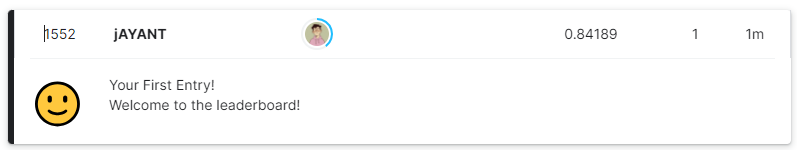